## S09 T01: Practicant amb training i test sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

*The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm.*

In [2]:
data=pd.read_csv('/Users/Diana/Downloads/archive/DelayedFlights.csv')
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
#dropping null values

data.dropna()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,7009705,2008,12,13,6,921.0,830,1112.0,1008,DL,...,8.0,21.0,0,N,0,51.0,0.0,13.0,0.0,0.0
1936752,7009709,2008,12,13,6,1552.0,1520,1735.0,1718,DL,...,9.0,7.0,0,N,0,0.0,0.0,0.0,0.0,17.0
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0


In [4]:
#dropping duplicates

data.drop_duplicates()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
#dropping the columns that I won't need

airlines=data.drop(['Unnamed: 0','CRSDepTime','CRSArrTime','FlightNum','TailNum', 'ActualElapsedTime', 'CRSElapsedTime','TaxiIn', 'TaxiOut','CancellationCode'], axis=1)
airlines.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,2211.0,WN,116.0,-14.0,8.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,1002.0,WN,113.0,2.0,19.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,804.0,WN,76.0,14.0,8.0,IND,BWI,515,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1959.0,WN,77.0,34.0,34.0,IND,BWI,515,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,2121.0,WN,87.0,11.0,25.0,IND,JAX,688,0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
airlines.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1928371.00,1928371.00,1936758.00,1936758.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,2008.0,6.11,15.75,3.98,1518.53,1610.14,108.28,42.20,43.19,765.69,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,0.0,3.48,8.78,2.00,450.49,548.18,68.64,56.78,53.40,574.48,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,2008.0,1.00,1.00,1.00,1.00,1.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1203.00,1316.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1545.00,1715.00,90.00,24.00,24.00,606.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1900.00,2030.00,137.00,56.00,53.00,998.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2400.00,1091.00,2461.00,2467.00,4962.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


For the Train-Test I will analyze to variables: arrival delay and departure delay. First, I would like to know visualize the correlation on the original data:

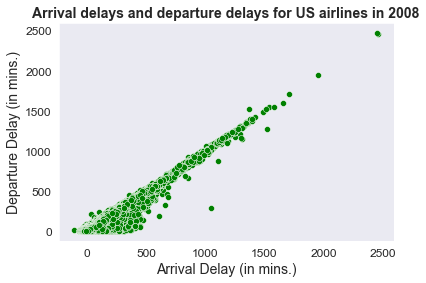

In [8]:
sns.set_style('dark')

chart=sns.scatterplot(x='ArrDelay', y='DepDelay', color='green', data=airlines)

plt.title('Arrival delays and departure delays for US airlines in 2008', loc='center', size=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel('Arrival Delay (in mins.)', size=14)
plt.ylabel('Departure Delay (in mins.)', size=14)
plt.show()

In [9]:
correl=airlines[['ArrDelay','DepDelay']]

correl.corr()

,ArrDelay,DepDelay
ArrDelay,1.000000,0.952927
DepDelay,0.952927,1.000000


There is a positive correlation between departure delays and arrivals delays.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#I will select two columns in order to apply the Train-Test Split

delays=airlines[['ArrDelay','DepDelay']]

#Split into train test sets
#I will choose randomly some observations to train the model, especifically 80% of the data

train_set, test_set=train_test_split(delays, test_size=0.2)

As we can see the dataset has been split into: 

- Train: 80% of observations

- Test: 20% of observations

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model.

In [12]:
train_set.describe().round(2)

,ArrDelay,DepDelay
count,1542618.00,1549406.00
mean,42.20,43.18
std,56.85,53.44
min,-109.00,6.00
25%,9.00,12.00
50%,24.00,24.00
75%,56.00,53.00
max,2461.00,2467.00


Train set for ArrDelay has a mean of 42.21 mins with a standard deviation of 56.90

Train set for DepDelay has a mean of 43.20 mins with a standard deviation of 53.53.

All these values are very similar to the ones in the original dataframe.

Let's visualize this data on a chart to compare it with the original.

In [13]:
delays_train=train_set.copy()

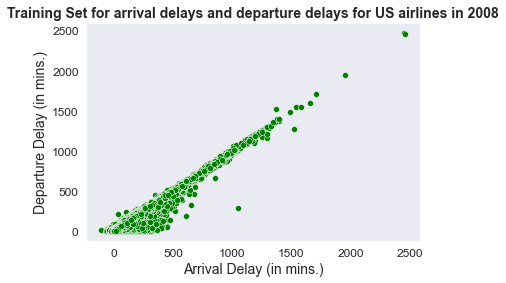

In [14]:
sns.set_style('dark')

chart=sns.scatterplot(delays_train['ArrDelay'], delays_train['DepDelay'], color='green')

plt.title('Training Set for arrival delays and departure delays for US airlines in 2008', loc='center', size=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel('Arrival Delay (in mins.)', size=14)
plt.ylabel('Departure Delay (in mins.)', size=14)
plt.show()

In [15]:
train_set.corr()

,ArrDelay,DepDelay
ArrDelay,1.000000,0.952971
DepDelay,0.952971,1.000000


It looks like the original data set, so it seems to be a fair selection.

In [16]:
test_set.describe().round(2)

,ArrDelay,DepDelay
count,385753.00,387352.00
mean,42.18,43.22
std,56.54,53.25
min,-59.00,6.00
25%,9.00,12.00
50%,24.00,24.00
75%,56.00,53.00
max,1510.00,1518.00


Test set for ArrDelay has a mean of 42.15 mins with a standard deviation of 56.34. Test set for DepDelay has a mean of 43.11 with a standard deviation of 52.91.

In [17]:
delays_set=test_set.copy()

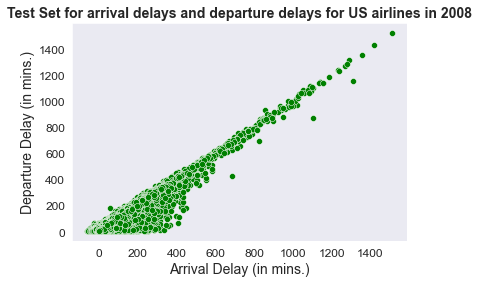

In [18]:
sns.set_style('dark')

chart=sns.scatterplot(delays_set['ArrDelay'], delays_set['DepDelay'], color='green')

plt.title('Test Set for arrival delays and departure delays for US airlines in 2008', loc='center', size=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel('Arrival Delay (in mins.)', size=14)
plt.ylabel('Departure Delay (in mins.)', size=14)
plt.show()

In [19]:
test_set.corr()

,ArrDelay,DepDelay
ArrDelay,1.000000,0.952748
DepDelay,0.952748,1.000000


The testing set also looks like the original data set.

### Exercici 2 i Exercici 3

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...)

In [20]:
#I will standardize numeric data:

from sklearn.preprocessing import StandardScaler

#initialize the scaler

scaler = StandardScaler()

In [21]:
airlines.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [22]:
#reorder columns so it can be easier to apply method for numerical values

airlines_scaled=airlines.loc[:,['Year','UniqueCarrier','Origin', 'Dest','Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime','AirTime', 'ArrDelay', 'DepDelay','Distance', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

airlines_scaled

,Year,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,WN,IAD,TPA,1,3,4,2003.0,2211.0,116.0,-14.0,8.0,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,WN,IAD,TPA,1,3,4,754.0,1002.0,113.0,2.0,19.0,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,WN,IND,BWI,1,3,4,628.0,804.0,76.0,14.0,8.0,515,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,WN,IND,BWI,1,3,4,1829.0,1959.0,77.0,34.0,34.0,515,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,WN,IND,JAX,1,3,4,1940.0,2121.0,87.0,11.0,25.0,688,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,DL,MSP,ATL,12,13,6,1250.0,1617.0,120.0,25.0,30.0,906,0,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,DL,RIC,ATL,12,13,6,657.0,904.0,78.0,75.0,57.0,481,0,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,DL,ATL,IAH,12,13,6,1007.0,1149.0,122.0,99.0,80.0,689,0,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,DL,IAD,ATL,12,13,6,1251.0,1446.0,89.0,9.0,11.0,533,0,0,NaN,NaN,NaN,NaN,NaN


In [23]:
#identify the numeric variables to be scaled. In this case, the last 16 columns contain numeric variables to scale

numeric=airlines_scaled.columns[-16:]

# fit the data using the scaler
airlines_scaled[numeric]= scaler.fit_transform(airlines_scaled[numeric])
airlines_scaled.head()

,Year,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,WN,IAD,TPA,-1.467635,-1.453177,0.007602,1.075431,1.096103,0.112508,-0.989701,-0.658868,0.077137,-0.018082,-0.063401,NaN,NaN,NaN,NaN,NaN
1,2008,WN,IAD,TPA,-1.467635,-1.453177,0.007602,-1.697135,-1.109385,0.068804,-0.707935,-0.452885,0.077137,-0.018082,-0.063401,NaN,NaN,NaN,NaN,NaN
2,2008,WN,IND,BWI,-1.467635,-1.453177,0.007602,-1.976834,-1.470582,-0.470220,-0.496611,-0.658868,-0.436371,-0.018082,-0.063401,NaN,NaN,NaN,NaN,NaN
3,2008,WN,IND,BWI,-1.467635,-1.453177,0.007602,0.689181,0.636398,-0.455652,-0.144403,-0.171999,-0.436371,-0.018082,-0.063401,-0.39451,-0.172316,-0.443993,-0.044562,0.1594
4,2008,WN,IND,JAX,-1.467635,-1.453177,0.007602,0.935582,0.931922,-0.309970,-0.549442,-0.340531,-0.135229,-0.018082,-0.063401,NaN,NaN,NaN,NaN,NaN


In [24]:
airlines_scaled.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1928371.00,1928371.00,1936758.00,1936758.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,2008.0,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,2008.0,-1.47,-1.68,-1.50,-3.37,-2.94,-1.58,-2.66,-0.70,-1.31,-0.02,-0.06,-0.44,-0.17,-0.44,-0.04,-0.60
25%,2008.0,-0.89,-0.88,-0.99,-0.70,-0.54,-0.73,-0.58,-0.58,-0.74,-0.02,-0.06,-0.44,-0.17,-0.44,-0.04,-0.60
50%,2008.0,-0.03,0.03,0.01,0.06,0.19,-0.27,-0.32,-0.36,-0.28,-0.02,-0.06,-0.39,-0.17,-0.38,-0.04,-0.41
75%,2008.0,0.83,0.83,1.01,0.85,0.77,0.42,0.24,0.18,0.40,-0.02,-0.06,0.04,-0.17,-0.00,-0.04,0.18
max,2008.0,1.69,1.74,1.51,1.96,1.44,14.32,42.60,45.39,7.30,55.31,15.77,55.50,62.73,39.66,193.75,30.69


Scaler has done a good job scaling mean to 0 and standard deviation to 1. Therefore, normalizing the data.

**Next, I will use Polynomial Regression**

In [25]:
#as the model still detects NaN values, I will delete them

delays_train.isnull().sum()

ArrDelay    6788
DepDelay       0
dtype: int64

In [26]:
#drop the specific values

delays_train.dropna(subset=['ArrDelay'], inplace=True)

In [27]:
#introducing an idependent variable:

train_set_x=delays_train.drop(['DepDelay'], axis=1)

#introducing a variable from which we want to predict the results depending of the first 

train_set_y=delays_train['DepDelay']

In [29]:
#fitting the linear regression model to the dataset

from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(train_set_x, train_set_y)

LinearRegression()

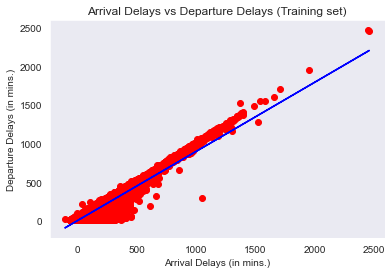

In [30]:
# Visualizing the Linear Regression results

plt.scatter(train_set_x, train_set_y, color = "red")
plt.plot(train_set_x, lin_reg.predict(train_set_x), color = "blue")
plt.title('Arrival Delays vs Departure Delays (Training set)')
plt.xlabel('Arrival Delays (in mins.)')
plt.ylabel('Departure Delays (in mins.)')
plt.show()

In [31]:
#fitting the polynomial regression model to the dataset

from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(train_set_x)
poly_reg.fit(X_poly,train_set_y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,train_set_y)

LinearRegression()

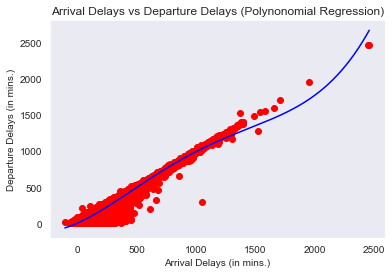

In [32]:
#Visualizing the pollynomial regression model results

X_grid = np.arange(min(train_set_x['ArrDelay']),max(train_set_x['ArrDelay']), 0.1) # choice of 0.1 instead of 0.01 to make the graph smoother

# reshapes the array to be a matrix
X_grid = X_grid.reshape((len(X_grid), 1)) 

# plots the training set
plt.scatter(train_set_x, train_set_y, color = 'red') 

# plots a polynomial regression line
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue') 
plt.title('Arrival Delays vs Departure Delays (Polynonomial Regression)') 
plt.xlabel('Arrival Delays (in mins.)') 
plt.ylabel('Departure Delays (in mins.)') 
plt.show() 

As we can see the line now is curve that has been smoothed.